In [7]:
%cd /Users/aleth/Documents/Python/0penclassroom/P7/data/

/Users/aleth/Documents/Python/0penclassroom/P7/data


In [2]:
import pandas as pd
import time
import numpy as np
from matplotlib.patches import Patch

In [3]:
t0 = time.time()
data = pd.read_csv('trainsample.csv')
time.time()-t0

1.6010661125183105

In [6]:
features_20 = pd.read_csv('features_20.csv')
keep = list(features_20['feature'])+['target']

In [8]:
data_20 = data[keep]
data_20.to_csv('data_20.csv')

In [9]:
t0 = time.time()
data_20 = pd.read_csv('data_20.csv')
time.time()-t0

0.0854341983795166

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data_20.head()

,Unnamed: 0,PAYMENT_RATE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,AMT_ANNUITY,APPROVED_CNT_PAYMENT_MEAN,INSTAL_DPD_MEAN,DAYS_EMPLOYED,...,AMT_GOODS_PRICE,DAYS_ID_PUBLISH,ACTIVE_DAYS_CREDIT_MAX,AMT_CREDIT,CODE_GENDER,CC_CNT_DRAWINGS_ATM_CURRENT_MEAN,INSTAL_PAYMENT_DIFF_MEAN,POS_MONTHS_BALANCE_SIZE,PREV_APP_CREDIT_PERC_MIN,target
0,0,0.029239,NaN,0.671874,NaN,-13856,40383.0,24.000000,0.100000,-2714.0,...,1206000.0,-4391,NaN,1381113.0,0,NaN,202.917375,41.0,1.000000,0.0
1,1,0.054287,0.313415,0.062233,0.535276,-7724,36643.5,NaN,NaN,-449.0,...,675000.0,-388,-693.0,675000.0,1,NaN,NaN,NaN,NaN,0.0
2,2,0.054540,NaN,0.343072,0.483050,-10343,24543.0,12.000000,5.875000,-161.0,...,450000.0,-78,-71.0,450000.0,0,NaN,2994.103125,24.0,0.825627,0.0
3,3,0.036019,NaN,0.637609,0.267869,-23119,46939.5,24.000000,0.449761,NaN,...,1125000.0,-4158,-202.0,1303200.0,0,0.697917,1075.553828,64.0,0.873211,0.0
4,4,0.033189,0.312759,0.664671,0.694093,-11969,30483.0,7.166667,1.139535,-2145.0,...,697500.0,-4474,NaN,918468.0,0,NaN,853.453256,46.0,0.966821,0.0


In [31]:
def plot_feature(datas, feature, n_bins, value):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    data = datas[datas[feature].notna()]
    print(data.shape)
    heights0, bins0 = np.histogram(data[data['target']==0][feature], density=True, bins=n_bins)
    bin_width = np.diff(bins0)[0]
    heights, bins = np.histogram(data[data['target']==1][feature], density=True, bins=bins0)
    heights *= -1
    bin_width = np.diff(bins)[0]
    bin_pos =( bins[:-1] + bin_width / 2)
    sns.histplot(ax=ax, x=data[data['target']==0][feature], stat="density", bins=n_bins, edgecolor='black', color='#2f78e8')
    ax.text(x=value+bin_width/2, y=min(heights)*1.2, s=f'{feature} = {round(value, 6)}', weight='bold')
    plt.bar(bin_pos, heights, width=bin_width, edgecolor='black', color='#f6245a')
    plt.vlines(value, max(heights0)*1.2, min(heights)*1.2, color='black', label='customer', linewidths=3)
    from matplotlib.lines import Line2D
    legend_elements = [Patch(facecolor='#2f78e8', edgecolor='#2f78e8',label='0'),
                      Patch(facecolor='#f6245a', edgecolor='#f6245a', label='1')]
    ax.legend(handles=legend_elements, loc='lower left')
    ax.set_xlabel('')
    plt.show()

In [17]:
some_customers = pd.read_csv('some_customers.csv')

(4194, 22)


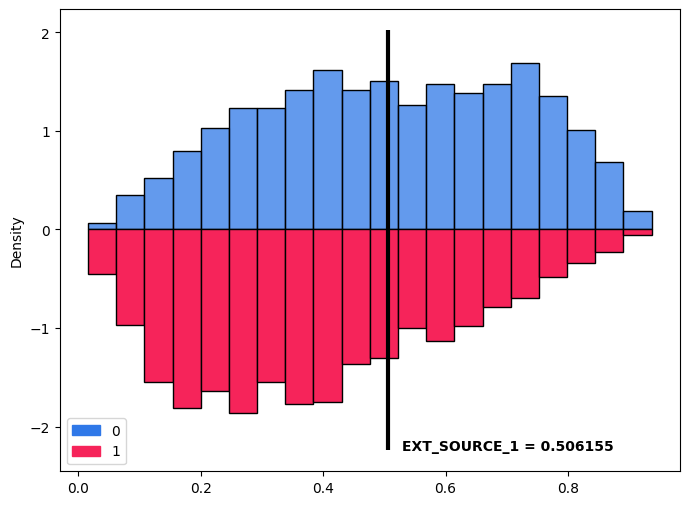

In [33]:
value_custom = some_customers[some_customers['SK_ID_CURR']==136116]['EXT_SOURCE_1'].values[0]
plot_feature(data_20, 'EXT_SOURCE_1', 20, value_custom)

In [11]:
value_custom = some_customers.loc[some_customers['SK_ID_CURR']==136116,'AMT_ANNUITY'].values[0]
(value_custom)

34155.0

In [34]:
features_20

,Unnamed: 0,feature
0,255,PAYMENT_RATE
1,31,EXT_SOURCE_1
2,32,EXT_SOURCE_2
3,33,EXT_SOURCE_3
4,10,DAYS_BIRTH
5,7,AMT_ANNUITY
6,589,APPROVED_CNT_PAYMENT_MEAN
7,641,INSTAL_DPD_MEAN
8,11,DAYS_EMPLOYED
9,660,INSTAL_AMT_PAYMENT_SUM


In [36]:
definitions = ['Ratio of loan annuity by credit amount of the loan', 
               'Normalized score from external data source 1', 
               'Normalized score from external data source 2', 
               'Normalized score from external data source 3',
               "Client's age in days at the time of application",
               'loan annuity',
               'Term of previous credit at application of the previous approved application',
               'Difference between when was the installements of previous credit paid actually and when it was actually paid', 
               'How many days before the application the client started current employment', 
               'what the client actulally paid on previous credit on this installment',
               'Term of previous credit at application of the previous application',
               'Price of the goods for which the loan is given',
               'How many days before the application did the client change the identity document with which he applied for the loan',
               'How many days before current application did the client apply for a credit bureau credit still active',
               'Credit amount of the loan',
               'Gender of the client',
               'Average number of drawings at ATM during a month on the previous application', 
               'Difference between what was the prescribed installment amount of the previous credit on this installment and the amount the client actually paid',
               'Month of balance relative to application date',
               'Ratio of how much credit did client ask on the previous application by the amount of the loan']
               
            

In [39]:
features_20['definitions'] = definitions
features_20.to_csv('features_20_def.csv')

In [41]:
features_20[features_20['feature']=='CODE_GENDER']['definitions'].values[0]

'Gender of the client'

In [42]:
features_20

,Unnamed: 0,feature,definitions
0,255,PAYMENT_RATE,Ratio of loan annuity by credit amount of the ...
1,31,EXT_SOURCE_1,Normalized score from external data source 1
2,32,EXT_SOURCE_2,Normalized score from external data source 2
3,33,EXT_SOURCE_3,Normalized score from external data source 3
4,10,DAYS_BIRTH,Client's age in days at the time of application
5,7,AMT_ANNUITY,loan annuity
6,589,APPROVED_CNT_PAYMENT_MEAN,Term of previous credit at application of the ...
7,641,INSTAL_DPD_MEAN,Difference between when was the installements ...
8,11,DAYS_EMPLOYED,How many days before the application the clien...
9,660,INSTAL_AMT_PAYMENT_SUM,what the client actulally paid on previous cre...
